# New baseline with 12?

In [23]:
from pathlib import Path
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Had to add this stuff to get notebook to find files, because it is not
# located in the root folder
ROOT = Path.cwd().parent
sys.path.insert(0, str(ROOT))

from tensorflow.keras import Sequential, Input, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

from bee_tector.config import (
    PROJECT_ROOT,
    SUBSPECIES_CLASS_NAMES,
    SUBSPECIES_COUNTRIES_CSV,
    SUBSPECIES_DATA_DIR,
    SUBSPECIES_HIGH_CONF_THRESHOLD,
    SUBSPECIES_MODEL_PATH,
    DETECTOR_CLASS_NAMES,
    DETECTOR_DATA_DIR,
    DETECTOR_MODEL_PATH,
    IMAGE_SIZE,
    MODELS_DIR,
    BEES_CSV_PATH
)
from bee_tector.plots import plot_history
from bee_tector.data import (
    load_datasets
)
from bee_tector.pipeline import preprocess_image, predict_detector, predict_subspecies
from api.predict import load_best_model, preprocess_image, predict, load_first_layer_model, predict_first_layer

In [2]:
train_ds, val_ds, test_ds = load_datasets()

Found 3619 files belonging to 12 classes.
Found 781 files belonging to 12 classes.
Found 781 files belonging to 12 classes.


In [2]:
# TODO edit shape=IMAGE_SIZE + (3,) for future models.

In [16]:
img_path = os.path.join(
    FULL_DATA_DIR, "test", "Red-tailed_Bumble_bee", "535031756.jpg"
)

img = load_img(img_path, target_size=IMAGE_SIZE)

img_array = img_to_array(img)

# We now have an array (224, 224, 3)
# Batch size is 1 for 1 image, our model accepts (batch_size, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

In [20]:
baseline_model = load_model(MODELS_DIR / "baseline_model.keras")

In [21]:
pred = baseline_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [22]:
pred

array([[0.0618692 , 0.12679347, 0.09051337, 0.11306442, 0.12979054,
        0.06030054, 0.07622439, 0.09393378, 0.04390454, 0.03508817,
        0.06704979, 0.10146785]], dtype=float32)

In [23]:
prediction = np.argmax(pred, axis=1)

In [24]:
prediction

array([4])

In [25]:
train_cn, val_cn, test_cn = load_datasets()

Found 3619 files belonging to 12 classes.
Found 781 files belonging to 12 classes.
Found 781 files belonging to 12 classes.


# 

In [26]:
class_names = train_cn.class_names
id_to_class = {i: name for i, name in enumerate(class_names)}

In [27]:
print("Predicted class:", id_to_class[prediction[0]])

Predicted class: Common_Eastern_Bumble_Bee


# Try predict

In [3]:
img_array = preprocess_image()
model = load_best_model()

val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_acc:.4f}")

test_loss, test_acc = model.evaluate(test_ds)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 483ms/step - accuracy: 0.8030 - loss: 0.8133
Validation loss: 0.8662, Validation accuracy: 0.7875
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 467ms/step - accuracy: 0.8285 - loss: 0.6730
Test loss: 0.8091, Test accuracy: 0.8067


In [4]:
img_array = preprocess_image()
model = load_best_model()
pred = predict(model, img_array=img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


In [5]:
pred

{'class': 'Red-tailed_Bumble_Bee', 'confidence': '99.83%'}

# First Layer Prediction

In [5]:
train_ds, val_ds, test_ds = load_datasets(data_dir=FIRST_LAYER_DIR)

Found 17766 files belonging to 3 classes.
Found 3810 files belonging to 3 classes.
Found 3810 files belonging to 3 classes.


In [ ]:
img_array = preprocess_image()
model = load_first_layer_model()

val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_acc:.4f}")

test_loss, test_acc = model.evaluate(test_ds)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

239/239 ━━━━━━━━━━━━━━━━━━━━ 72s 296ms/step - accuracy: 0.9200 - loss: 0.3693
Validation loss: 0.3469, Validation accuracy: 0.9202
239/239 ━━━━━━━━━━━━━━━━━━━━ 75s 313ms/step - accuracy: 0.8823 - loss: 0.5327
Test loss: 0.3601, Test accuracy: 0.9194


In [9]:
img_array = preprocess_image()
model = load_first_layer_model()
pred = predict_first_layer(model, img_array=img_array)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


{'class': 'bumble_bees', 'confidence': '99.98%'}

# CSV

In [5]:
full_df = pd.read_csv(BEES_CSV_PATH)

In [6]:
full_df.head()

,id,observed_on,scientific_name,common_name,photo_url,location,license
0,306444296,2025-08-15,Bombus,Bumble Bees,https://inaturalist-open-data.s3.amazonaws.com...,"63.6582816672,28.3958057128",cc-by
1,306442436,2025-08-14,Bombus bohemicus,Bohemian Cuckoo Bumble bee,https://inaturalist-open-data.s3.amazonaws.com...,"55.1668805086,25.8369277045",cc-by
2,306442093,2025-08-09,Bombus lucorum,White-tailed Bumble Bee,https://inaturalist-open-data.s3.amazonaws.com...,"55.8554033333,-4.0173916667",cc0
3,306441992,2025-07-29,Bombus pascuorum,Common Carder Bumble Bee,https://inaturalist-open-data.s3.amazonaws.com...,"56.480225,-5.9940616667",cc0
4,306439346,2025-08-14,Bombus,Bumble Bees,https://inaturalist-open-data.s3.amazonaws.com...,"55.9393141806,-3.1699150801",cc0


In [7]:
name_loc_df = full_df.drop(columns=["id", "photo_url", "license"])

In [8]:
name_loc_df.head()

,observed_on,scientific_name,common_name,location
0,2025-08-15,Bombus,Bumble Bees,"63.6582816672,28.3958057128"
1,2025-08-14,Bombus bohemicus,Bohemian Cuckoo Bumble bee,"55.1668805086,25.8369277045"
2,2025-08-09,Bombus lucorum,White-tailed Bumble Bee,"55.8554033333,-4.0173916667"
3,2025-07-29,Bombus pascuorum,Common Carder Bumble Bee,"56.480225,-5.9940616667"
4,2025-08-14,Bombus,Bumble Bees,"55.9393141806,-3.1699150801"


In [9]:
name_loc_df.groupby(name_loc_df["common_name"]).count()

,observed_on,scientific_name,location
common_name,,,
Alpine Bumble Bee,2,2,2
Amazonian Bumble Bee,1,1,1
American Bumble Bee,218,218,217
Andean Red Bumble Bee,1,1,1
Ashton's Cuckoo Bumble Bee,1,1,1
...,...,...,...
Yellow-banded Bumble Bee,75,75,75
Yellow-faced Bumble Bee,285,285,285
Yellow-fronted Bumble Bee,58,58,57


In [10]:
name_loc_df['class_name'] = name_loc_df['common_name'].str.replace(" ", "_")

In [11]:
name_loc_df

,observed_on,scientific_name,common_name,location,class_name
0,2025-08-15,Bombus,Bumble Bees,"63.6582816672,28.3958057128",Bumble_Bees
1,2025-08-14,Bombus bohemicus,Bohemian Cuckoo Bumble bee,"55.1668805086,25.8369277045",Bohemian_Cuckoo_Bumble_bee
2,2025-08-09,Bombus lucorum,White-tailed Bumble Bee,"55.8554033333,-4.0173916667",White-tailed_Bumble_Bee
3,2025-07-29,Bombus pascuorum,Common Carder Bumble Bee,"56.480225,-5.9940616667",Common_Carder_Bumble_Bee
4,2025-08-14,Bombus,Bumble Bees,"55.9393141806,-3.1699150801",Bumble_Bees
...,...,...,...,...,...
9986,2025-07-11,Bombus terrestris,Buff-tailed Bumble Bee,"51.392155,1.39308",Buff-tailed_Bumble_Bee
9987,2025-07-11,Bombus terrestris,Buff-tailed Bumble Bee,"51.3923416667,1.39232",Buff-tailed_Bumble_Bee
9988,2025-07-09,Bombus griseocollis,Brown-belted Bumble Bee,"36.1364903292,-95.907794499",Brown-belted_Bumble_Bee
9989,2025-07-11,Bombus terrestris,Buff-tailed Bumble Bee,"51.391675,1.3835133333",Buff-tailed_Bumble_Bee


In [24]:
from geopy.geocoders import Nominatim
import time

lat, lon = 51.5074, -0.1278
geo = Nominatim(user_agent="bee-tector")
loc = geo.reverse((lat, lon), language="en")

country = loc.raw["address"].get("country")
code = loc.raw["address"].get("country_code", "").upper()
print(country, code)

United Kingdom GB


In [12]:
name_loc_df[["lat","lon"]] = name_loc_df["location"].str.split(",", n=1, expand=True).astype(float)

In [19]:
name_loc_df

,observed_on,scientific_name,common_name,location,class_name,lat,lon
0,2025-08-15,Bombus,Bumble Bees,"63.6582816672,28.3958057128",Bumble_Bees,63.658282,28.395806
1,2025-08-14,Bombus bohemicus,Bohemian Cuckoo Bumble bee,"55.1668805086,25.8369277045",Bohemian_Cuckoo_Bumble_bee,55.166881,25.836928
2,2025-08-09,Bombus lucorum,White-tailed Bumble Bee,"55.8554033333,-4.0173916667",White-tailed_Bumble_Bee,55.855403,-4.017392
3,2025-07-29,Bombus pascuorum,Common Carder Bumble Bee,"56.480225,-5.9940616667",Common_Carder_Bumble_Bee,56.480225,-5.994062
4,2025-08-14,Bombus,Bumble Bees,"55.9393141806,-3.1699150801",Bumble_Bees,55.939314,-3.169915
...,...,...,...,...,...,...,...
9986,2025-07-11,Bombus terrestris,Buff-tailed Bumble Bee,"51.392155,1.39308",Buff-tailed_Bumble_Bee,51.392155,1.393080
9987,2025-07-11,Bombus terrestris,Buff-tailed Bumble Bee,"51.3923416667,1.39232",Buff-tailed_Bumble_Bee,51.392342,1.392320
9988,2025-07-09,Bombus griseocollis,Brown-belted Bumble Bee,"36.1364903292,-95.907794499",Brown-belted_Bumble_Bee,36.136490,-95.907794
9989,2025-07-11,Bombus terrestris,Buff-tailed Bumble Bee,"51.391675,1.3835133333",Buff-tailed_Bumble_Bee,51.391675,1.383513


In [20]:
geo = Nominatim(user_agent="bee-tector")

In [21]:
name_loc_df["country"] = pd.NA
name_loc_df["country_code"] = pd.NA

In [25]:
for i, row in name_loc_df.iterrows():
    try:
        loc = geo.reverse((row["lat"], row["lon"]), language="en", exactly_one=True)
        if loc and "address" in loc.raw:
            addr = loc.raw["address"]
            name_loc_df.loc[i, "country"] = addr.get("country")
            name_loc_df.loc[i, "country_code"] = (addr.get("country_code") or "").upper()
    except Exception:
        pass
    time.sleep(1)

KeyboardInterrupt: 

# Train, Test, Val Split

In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

def reorganize_dataset(source_dir, target_dir, val_ratio=0.15, test_ratio=0.15, random_seed=42):
    """
    Reorganizes image dataset into train/val/test directories.

    Args:
        source_dir: Path to the directory containing class subfolders
        target_dir: Path where the new directory structure will be created
        val_ratio: Proportion of data for validation (default: 0.15)
        test_ratio: Proportion of data for testing (default: 0.15)
        random_seed: Random seed for reproducibility
    """
    # Create target directories
    os.makedirs(os.path.join(target_dir, 'train'), exist_ok=True)
    os.makedirs(os.path.join(target_dir, 'val'), exist_ok=True)
    os.makedirs(os.path.join(target_dir, 'test'), exist_ok=True)

    # Get list of all class directories
    class_dirs = [d for d in os.listdir(source_dir)
                 if os.path.isdir(os.path.join(source_dir, d))]

    for class_dir in class_dirs:
        # Create class subdirectories in train/val/test
        os.makedirs(os.path.join(target_dir, 'train', class_dir), exist_ok=True)
        os.makedirs(os.path.join(target_dir, 'val', class_dir), exist_ok=True)
        os.makedirs(os.path.join(target_dir, 'test', class_dir), exist_ok=True)

        # Get all image files for this class
        source_class_dir = os.path.join(source_dir, class_dir)
        images = [f for f in os.listdir(source_class_dir)
                 if os.path.isfile(os.path.join(source_class_dir, f))]

        # Split into train, val, test
        train_val, test = train_test_split(
            images, test_size=test_ratio, random_state=random_seed)
        train, val = train_test_split(
            train_val, test_size=val_ratio/(1-test_ratio), random_state=random_seed)

        # Copy files to their new locations
        for img in train:
            src = os.path.join(source_class_dir, img)
            dst = os.path.join(target_dir, 'train', class_dir, img)
            shutil.copy2(src, dst)

        for img in val:
            src = os.path.join(source_class_dir, img)
            dst = os.path.join(target_dir, 'val', class_dir, img)
            shutil.copy2(src, dst)

        for img in test:
            src = os.path.join(source_class_dir, img)
            dst = os.path.join(target_dir, 'test', class_dir, img)
            shutil.copy2(src, dst)

        print(f"Processed {class_dir}: {len(train)} train, {len(val)} val, {len(test)} test images")

    print("\nReorganization complete!")
    print(f"New directory structure created at: {target_dir}")

# Example usage
if __name__ == "__main__":
    SOURCE_DIR = "../raw_data/bumble_ternary_unsplit"  # Your current directory with class subfolders
    TARGET_DIR = "../raw_data/bumble_ternary"  # Where the new structure will be created

    reorganize_dataset(
        source_dir=SOURCE_DIR,
        target_dir=TARGET_DIR,
        val_ratio=0.15,  # 15% for validation
        test_ratio=0.15,  # 15% for testing
        random_seed=42    # For reproducibility
    )

Processed others: 5922 train, 1270 val, 1270 test images
Processed bumble_bees: 5922 train, 1270 val, 1270 test images
Processed lookalikes: 5922 train, 1270 val, 1270 test images

Reorganization complete!
New directory structure created at: ../raw_data/bumble_ternary


# Pipeline Test

In [28]:
from bee_tector.pipeline import run_pipeline
from bee_tector.config import SUBSPECIES_DATA_DIR, DETECTOR_DATA_DIR

test_img_bee = DETECTOR_DATA_DIR / "test" / "bumble_bees" / "535016645.jpg"
test_img_not_bee = DETECTOR_DATA_DIR / "test" / "others" / "00022.jpg"

print("=== Bumblebee image ===")
result_bee = run_pipeline(str(test_img_bee), country_code="GB")
print(result_bee)

print("\n=== Non-bumblebee image ===")
result_not_bee = run_pipeline(str(test_img_not_bee), country_code="RU")
print(result_not_bee)


=== Bumblebee image ===
{'stage': 'subspecies_high_conf', 'bumblebee_prob': 0.7612341046333313, 'prediction': {'class_name': 'Yellow-faced_Bumble_Bee', 'prob': 0.9200544953346252}, 'context_species_in_country': [{'class_name': "Barbut's_Cuckoo_Bumble_bee", 'common_name': "Barbut's Cuckoo Bumble bee", 'scientific_name': 'Bombus barbutellus'}, {'class_name': 'Bohemian_Cuckoo_Bumble_bee', 'common_name': 'Bohemian Cuckoo Bumble bee', 'scientific_name': 'Bombus bohemicus'}, {'class_name': 'British_Buff-tailed_Bumblebee', 'common_name': 'British Buff-tailed Bumblebee', 'scientific_name': 'Bombus terrestris audax'}, {'class_name': 'Brown-banded_Carder-Bumble_bee', 'common_name': 'Brown-banded Carder-Bumble bee', 'scientific_name': 'Bombus humilis'}, {'class_name': 'Buff-tailed_Bumble_Bee', 'common_name': 'Buff-tailed Bumble Bee', 'scientific_name': 'Bombus terrestris'}, {'class_name': 'Common_Carder_Bumble_Bee', 'common_name': 'Common Carder Bumble Bee', 'scientific_name': 'Bombus pascuorum'}

In [29]:
result_bee

{'stage': 'subspecies_high_conf',
 'bumblebee_prob': 0.7612341046333313,
 'prediction': {'class_name': 'Yellow-faced_Bumble_Bee',
  'prob': 0.9200544953346252},
 'context_species_in_country': [{'class_name': "Barbut's_Cuckoo_Bumble_bee",
   'common_name': "Barbut's Cuckoo Bumble bee",
   'scientific_name': 'Bombus barbutellus'},
  {'class_name': 'Bohemian_Cuckoo_Bumble_bee',
   'common_name': 'Bohemian Cuckoo Bumble bee',
   'scientific_name': 'Bombus bohemicus'},
  {'class_name': 'British_Buff-tailed_Bumblebee',
   'common_name': 'British Buff-tailed Bumblebee',
   'scientific_name': 'Bombus terrestris audax'},
  {'class_name': 'Brown-banded_Carder-Bumble_bee',
   'common_name': 'Brown-banded Carder-Bumble bee',
   'scientific_name': 'Bombus humilis'},
  {'class_name': 'Buff-tailed_Bumble_Bee',
   'common_name': 'Buff-tailed Bumble Bee',
   'scientific_name': 'Bombus terrestris'},
  {'class_name': 'Common_Carder_Bumble_Bee',
   'common_name': 'Common Carder Bumble Bee',
   'scientific

In [4]:
result_not_bee

{'stage': 'no_bumblebee_detected',
 'bumblebee_prob': 1.1648227521421362e-11,
 'threshold': 0.75,
 'context_species_in_country': [{'class_name': 'Bohemian_Cuckoo_Bumble_bee',
   'common_name': 'Bohemian Cuckoo Bumble bee',
   'scientific_name': 'Bombus bohemicus'},
  {'class_name': 'Broken-belted_Bumble_Bee',
   'common_name': 'Broken-belted Bumble Bee',
   'scientific_name': 'Bombus soroeensis'},
  {'class_name': 'Brown-banded_Carder-Bumble_bee',
   'common_name': 'Brown-banded Carder-Bumble bee',
   'scientific_name': 'Bombus humilis'},
  {'class_name': 'Buff-tailed_Bumble_Bee',
   'common_name': 'Buff-tailed Bumble Bee',
   'scientific_name': 'Bombus terrestris'},
  {'class_name': 'Common_Carder_Bumble_Bee',
   'common_name': 'Common Carder Bumble Bee',
   'scientific_name': 'Bombus pascuorum'},
  {'class_name': 'Cousinly_Bumble_Bee',
   'common_name': 'Cousinly Bumble Bee',
   'scientific_name': 'Bombus consobrinus'},
  {'class_name': 'Cryptic_Bumble_Bee',
   'common_name': 'Crypti

# Picking the Thresholds

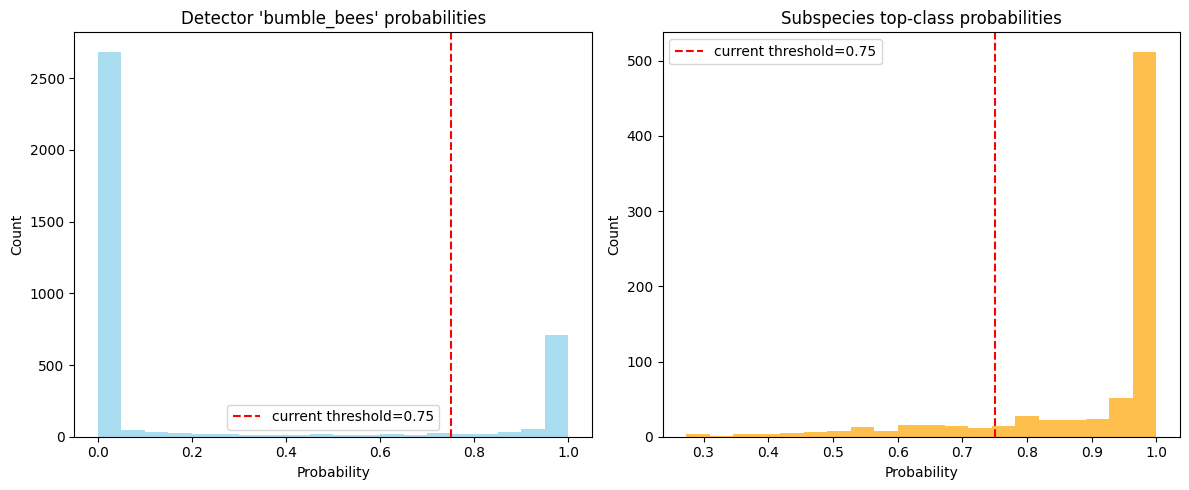

In [24]:
# DETECTOR
detector_test_dir = DETECTOR_DATA_DIR / "test"
detector_scores = []

for cls in os.listdir(detector_test_dir):
    cls_dir = detector_test_dir / cls
    if not cls_dir.is_dir():
        continue
    for img_file in os.listdir(cls_dir):
        img_path = cls_dir / img_file
        try:
            x = preprocess_image(str(img_path))
            res = predict_detector(x)
            detector_scores.append((cls, res["probs"]["bumble_bees"]))
        except Exception as e:
            print(f"⚠️ Skipped {img_path}: {e}")

# SUBSPECIES
subspecies_test_dir = SUBSPECIES_DATA_DIR / "test"
subspecies_scores = []

for cls in os.listdir(subspecies_test_dir):
    cls_dir = subspecies_test_dir / cls
    if not cls_dir.is_dir():
        continue
    for img_file in os.listdir(cls_dir):
        img_path = cls_dir / img_file
        try:
            x = preprocess_image(str(img_path))
            res = predict_subspecies(x)
            subspecies_scores.append((cls, res["prob"]))
        except Exception as e:
            print(f"⚠️ Skipped {img_path}: {e}")

# PLOTS
det_vals = [p for _, p in detector_scores]
sub_vals = [p for _, p in subspecies_scores]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(det_vals, bins=20, alpha=0.7, color="skyblue")
plt.axvline(0.75, color="red", linestyle="--", label="current threshold=0.75")
plt.title("Detector 'bumble_bees' probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(sub_vals, bins=20, alpha=0.7, color="orange")
plt.axvline(0.75, color="red", linestyle="--", label="current threshold=0.75")
plt.title("Subspecies top-class probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()
